# CMF 2022 F QA  : High Frequency Market Making: Optimal Quoting (Бойко, Минасян, Ширяев) -- Тестирование гипотез



<br>

# Содержание <a name=content></a>

- [<span style="color:red">**Версионность**</span>](#versions)
- [<span style="color:red">**Конфигурационные файлы**</span>](#config_files)
  
  
- [<span style="color:brown">**Импорт библиотек + Master Scale + Словарь**</span>](#initial_import)
- [Определение функций](#functions)
  
  
- [**Загрузка данных**](#upld_data)


- [**EDA** (Exploratory Data Analysis)](#eda)
    - [Динамика показателей](#vars_dynamic)
    - [Расчёт статистик (+гистограммы распределений)](#statistics_histogramms)
  
  
- [**Features Engineering**](#features)

<br>
  
  
# Версионность <a name=versions></a>


In [1]:
c_version_r = "01_1"
c_version_w = "01_2"

from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important; }</style>"))

In [2]:
%%javascript

Jupyter.keyboard_manager.disable()

<IPython.core.display.Javascript object>

<br>
  
  
# Конфигурационные файлы <a name=config_files></a>


[Содержание](#content)

In [3]:
#
#
#
___pathr_btc___file1 = "C:\\Users\\ivanmipt\\Desktop\\Science\\u___Universities\\u__2__1_RUS__MSU___CMF2022_F_QA\\u__2__1_f____HF_Market_Making_Optimal_Quoting___boyko\\data\\btcusdt_Binance_LinearPerpetual\\lobs.csv"
___pathr_btc___file2 = "C:\\Users\\ivanmipt\\Desktop\\Science\\u___Universities\\u__2__1_RUS__MSU___CMF2022_F_QA\\u__2__1_f____HF_Market_Making_Optimal_Quoting___boyko\\data\\btcusdt_Binance_LinearPerpetual\\trades.csv"
___pathr_eth___file1 = "C:\\Users\\ivanmipt\\Desktop\\Science\\u___Universities\\u__2__1_RUS__MSU___CMF2022_F_QA\\u__2__1_f____HF_Market_Making_Optimal_Quoting___boyko\\data\\ethusdt_Binance_LinearPerpetual\\lobs.csv"
___pathr_eth___file2 = "C:\\Users\\ivanmipt\\Desktop\\Science\\u___Universities\\u__2__1_RUS__MSU___CMF2022_F_QA\\u__2__1_f____HF_Market_Making_Optimal_Quoting___boyko\\data\\ethusdt_Binance_LinearPerpetual\\trades.csv"

<br>
  
  
# Импорт библиотек + Master Scale + Словарь <a name = initial_import></a>


[Содержание](#content)

In [7]:
#Импорт необходимых библиотек

import time
import csv
import pandas as pd
import numpy as np
import scipy.stats as st
import itertools as it
import numpy.matlib as nm
from sklearn import tree
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import ensemble
import pydotplus
from IPython.display import Image  
import matplotlib.pyplot as plt
import random
%matplotlib inline
from io import StringIO

import seaborn as sns

import os

pd.set_option("display.max_rows",3001)
pd.set_option("display.max_columns",3001)
pd.set_option("display.max_colwidth",255)
pd.set_option("display.width",255)

___tot_t___ = {0:0}

<br>
  
  
# Определение функций <a name=functions></a>


[Содержание](#content)

<br>
  
  
# Загрузка данных <a name=upld_data></a>
  
  
[Содержание](#content)

In [8]:
___start_t___ = time.time()
#  -- time bracket - start
#
#
#
#  ----- Загрузка данных
#
#  -- btc
#
DEV_BTC = pd.read_csv(___pathr_btc___file1 , skipinitialspace = True)
for vara in list(DEV_BTC.columns):
    DEV_BTC.rename(columns = {vara : vara.replace('btcusdt:Binance:LinearPerpetual_','')}, inplace=True )
for vara in list(DEV_BTC.columns):
    DEV_BTC.rename(columns = {vara : vara.replace('ask_','ask(продажа)_')}, inplace=True )
    DEV_BTC.rename(columns = {vara : vara.replace('bid_','bid(покупка)_')}, inplace=True )

DEV_BTC['receive_ts']     = DEV_BTC['receive_ts'].map(lambda x: pd.to_datetime(x))
DEV_BTC['exchange_ts']    = DEV_BTC['exchange_ts'].map(lambda x: pd.to_datetime(x))
DEV_BTC['best_price_ask'] = DEV_BTC['ask(продажа)_price_0']
DEV_BTC['best_price_bid'] = DEV_BTC['bid(покупка)_price_0']
DEV_BTC['midprice']       = DEV_BTC[['best_price_ask','best_price_bid']].mean(axis=1)
DEV_BTC['ticker']         = 'BTC'
print('\nОбъем датасета со срезами стаканов (BTC) : ',DEV_BTC.shape[0])
#
DEV_BTC_trades_                = pd.read_csv(___pathr_btc___file2 , skipinitialspace = True)
DEV_BTC_trades_['receive_ts']  = DEV_BTC_trades_['receive_ts'].map(lambda x: pd.to_datetime(x))
DEV_BTC_trades_['exchange_ts'] = DEV_BTC_trades_['exchange_ts'].map(lambda x: pd.to_datetime(x))
DEV_BTC_trades_['ticker']      = 'BTC'
print('\nОбъем датасета со СДЕЛКАМИ стаканов (BTC) : ',DEV_BTC_trades_.shape[0])
#
g = DEV_BTC_trades_.groupby(['receive_ts'])['receive_ts'].agg(['count'])
g.reset_index(inplace=True)
print('\ncheck duplicates DEV_BTC_trades_ : ',sum(g['count']>1))
#
g = DEV_BTC_trades_.groupby(['exchange_ts','aggro_side'])['exchange_ts'].agg(['count'])
g.reset_index(inplace=True)
print('\ncheck duplicates DEV_BTC_trades_ : ',sum(g['count']>1))
#
#  -- eth
#
DEV_ETH = pd.read_csv(___pathr_eth___file1 , skipinitialspace = True)
for vara in list(DEV_ETH.columns):
    DEV_ETH.rename(columns = {vara : vara.replace('ethusdt:Binance:LinearPerpetual_','')}, inplace=True )
for vara in list(DEV_ETH.columns):
    DEV_ETH.rename(columns = {vara : vara.replace('ask_','ask(продажа)_')}, inplace=True )
    DEV_ETH.rename(columns = {vara : vara.replace('bid_','bid(покупка)_')}, inplace=True )

DEV_ETH['receive_ts']  = DEV_ETH['receive_ts'].map(lambda x: pd.to_datetime(x))
DEV_ETH['exchange_ts'] = DEV_ETH['exchange_ts'].map(lambda x: pd.to_datetime(x))
DEV_ETH['best_price_ask'] = DEV_ETH['ask(продажа)_price_0']
DEV_ETH['best_price_bid'] = DEV_ETH['bid(покупка)_price_0']
DEV_ETH['midprice'] = DEV_ETH[['best_price_ask','best_price_bid']].mean(axis=1)
DEV_ETH['ticker'] = 'ETH'
print('\nОбъем датасета со срезами стаканов (ETH) : ',DEV_ETH.shape[0])
#
DEV_ETH_trades_                = pd.read_csv(___pathr_eth___file2 , skipinitialspace = True)
DEV_ETH_trades_['receive_ts']  = DEV_ETH_trades_['receive_ts'].map(lambda x: pd.to_datetime(x))
DEV_ETH_trades_['exchange_ts'] = DEV_ETH_trades_['exchange_ts'].map(lambda x: pd.to_datetime(x))
DEV_ETH_trades_['ticker']      = 'ETH'
print('\nОбъем датасета со СДЕЛКАМИ стаканов (ETH) : ',DEV_ETH_trades_.shape[0])
#
g = DEV_ETH_trades_.groupby(['receive_ts'])['receive_ts'].agg(['count'])
g.reset_index(inplace=True)
print('\ncheck duplicates DEV_ETH_trades_ : ',sum(g['count']>1))
#
g = DEV_ETH_trades_.groupby(['exchange_ts','aggro_side'])['exchange_ts'].agg(['count'])
g.reset_index(inplace=True)
print('\ncheck duplicates DEV_ETH_trades_ : ',sum(g['count']>1))
#
#
# -- time bracket - end
___end_t___ = time.time() ; t___n = sorted(list(___tot_t___.keys()))[-1]
print('\n\nВремя затраченное на исполнение ЯЧЕЙКИ кода : ',round((___end_t___ - ___start_t___)/60,4),'мин')
___tot_t___[t___n+1] = ___tot_t___[t___n] + (___end_t___ - ___start_t___) ; print('\nВремя затраченное на исполнение СУММАРНОЕ : ',round(___tot_t___[sorted(list(___tot_t___.keys()))[-1]]/60,4),'мин')


Объем датасета со срезами стаканов (BTC) :  2541356

Объем датасета со СДЕЛКАМИ стаканов (BTC) :  5727714

check duplicates DEV_BTC_trades_ :  0

check duplicates DEV_BTC_trades_ :  690531

Объем датасета со срезами стаканов (ETH) :  2539699

Объем датасета со СДЕЛКАМИ стаканов (ETH) :  4873803

check duplicates DEV_ETH_trades_ :  0

check duplicates DEV_ETH_trades_ :  629409


Время затраченное на исполнение ЯЧЕЙКИ кода :  57.7528 мин

Время затраченное на исполнение СУММАРНОЕ :  57.7528 мин


In [11]:
___start_t___ = time.time()
#  -- time bracket - start
#
#
#
#  ----- Дополнительная обработка данных (устранение дубликатов из файлов trades)
#
g = DEV_BTC_trades_.groupby(['exchange_ts','aggro_side'])['exchange_ts'].agg(['count'])
g.reset_index(inplace=True)
print('\ncheck duplicates DEV_BTC_trades_ : ',sum(g['count']>1))
#
indx1 = pd.MultiIndex.from_arrays([ g.loc[g['count']>1 , col] for col in ['exchange_ts','aggro_side'] ])
indx2 = pd.MultiIndex.from_arrays([ DEV_BTC_trades_[col] for col in ['exchange_ts','aggro_side'] ])
#
DEV_BTC_trades_with_duplicates = DEV_BTC_trades_.loc[ indx2.isin(indx1)]
DEV_BTC_trades_sans_duplicates = DEV_BTC_trades_.loc[~(indx2.isin(indx1))]
print( '\nЧисло наблюдений в датасете DEV_BTC_trades_ без дублирований : ',DEV_BTC_trades_sans_duplicates.shape[0]
      ,'\nЧисло наблюдений в датасете DEV_BTC_trades_ с дублированиями : ',DEV_BTC_trades_with_duplicates.shape[0]
     )
#  -- "свёртка дублирований"
#

#
#
# -- time bracket - end
___end_t___ = time.time() ; t___n = sorted(list(___tot_t___.keys()))[-1]
print('\n\nВремя затраченное на исполнение ЯЧЕЙКИ кода : ',round((___end_t___ - ___start_t___)/60,4),'мин')
___tot_t___[t___n+1] = ___tot_t___[t___n] + (___end_t___ - ___start_t___) ; print('\nВремя затраченное на исполнение СУММАРНОЕ : ',round(___tot_t___[sorted(list(___tot_t___.keys()))[-1]]/60,4),'мин')


check duplicates DEV_BTC_trades_ :  690531


Время затраченное на исполнение ЯЧЕЙКИ кода :  1.2593 мин

Время затраченное на исполнение СУММАРНОЕ :  59.0121 мин


In [20]:
___start_t___ = time.time()
#  -- time bracket - start
#
#
l___ = []
for row in (DEV_BTC_trades_with_duplicates[['exchange_ts','aggro_side']].head(4209).drop_duplicates()).iterrows():
    #
    t___ = DEV_BTC_trades_with_duplicates.loc[(DEV_BTC_trades_with_duplicates['exchange_ts']==row[1]['exchange_ts']) & (DEV_BTC_trades_with_duplicates['aggro_side']==row[1]['aggro_side']),:]
    v1 = t___['receive_ts'].max(axis=0)
    v2 = row[1]['exchange_ts']
    v3 = row[1]['aggro_side']
    v4 = t___['price'].max(axis=0) if row[1]['aggro_side'] == 'BID' else t___['price'].min(axis=0) if row[1]['aggro_side'] == 'ASK' else np.nan    
    v5 = round(t___['size'].sum(axis=0),6)
    l___.append([v1,v2,v3,v4,v5])
#
#
# -- time bracket - end
___end_t___ = time.time() ; t___n = sorted(list(___tot_t___.keys()))[-1]
print('\n\nВремя затраченное на исполнение ЯЧЕЙКИ кода : ',round((___end_t___ - ___start_t___)/60,4),'мин')
___tot_t___[t___n+1] = ___tot_t___[t___n] + (___end_t___ - ___start_t___) ; print('\nВремя затраченное на исполнение СУММАРНОЕ : ',round(___tot_t___[sorted(list(___tot_t___.keys()))[-1]]/60,4),'мин')



Время затраченное на исполнение ЯЧЕЙКИ кода :  7.1533 мин

Время затраченное на исполнение СУММАРНОЕ :  66.7311 мин


<br>
  
  
# EDA (Exploratory Data Analysis) <a name=eda></a>
  
  
[Содержание](#content)

In [ ]:
#
#  ---- Очистка данных
#
#
# These are the usual ipython objects, including this one you are creating. Get a sorted list of the objects and their sizes
#
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']
l___ = sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)
print(l___)

<br>
  
  
## Динамика показателей <a name=vars_dynamic></a>
  
  
[Содержание](#content)

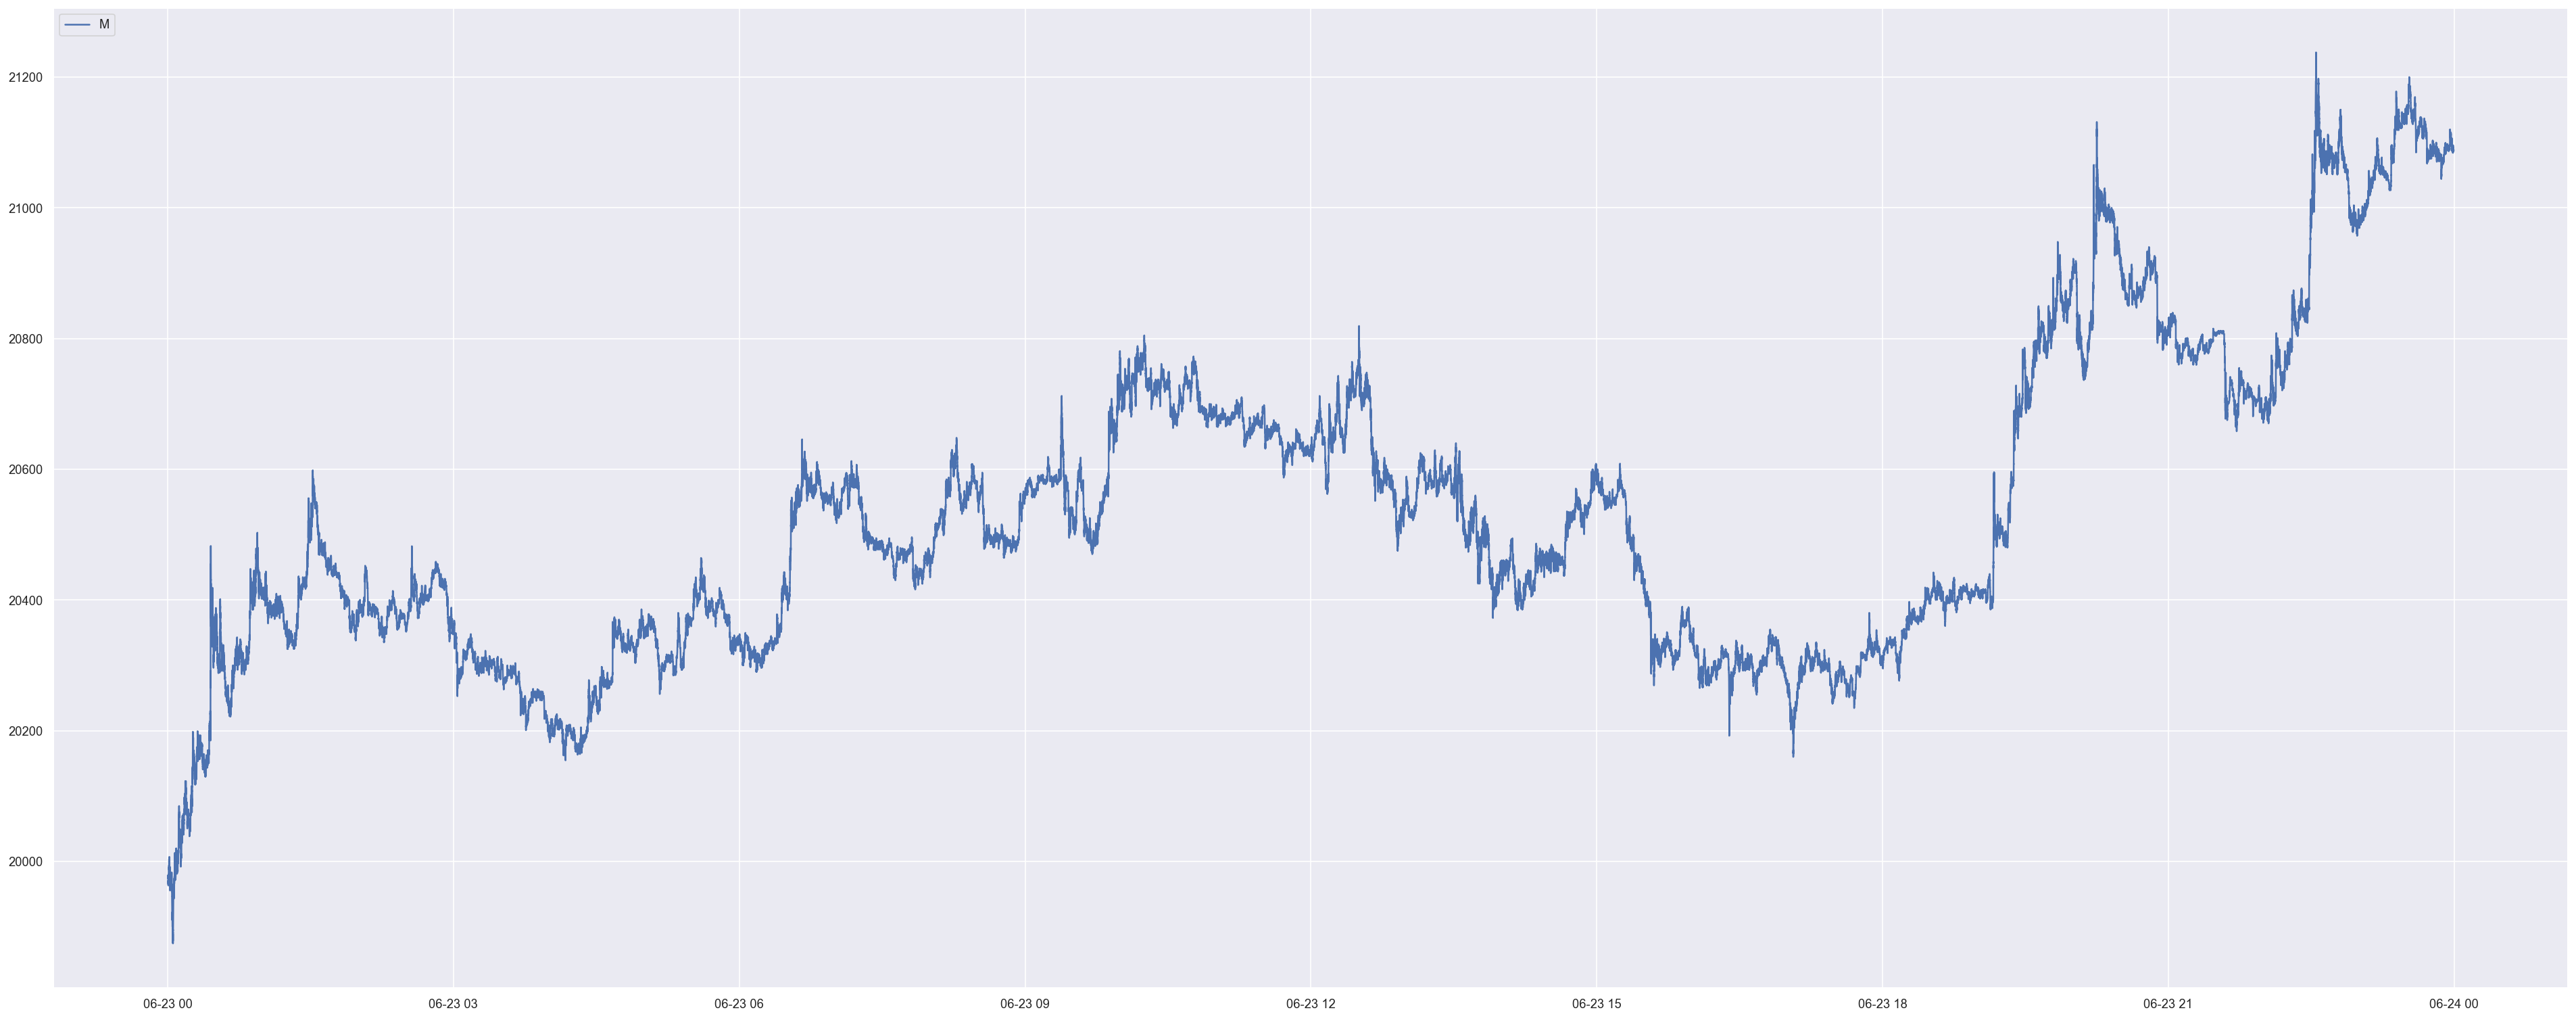

In [33]:
from matplotlib.pyplot import figure
sns.set()

figure(figsize=(40, 16), dpi=120)
plt.plot(DEV_BTC['exchange_ts'],DEV_BTC[['midprice']])
plt.legend("Midprice", ncol=1, loc='upper left');



<br>
  
  
## Расчёт статистик (+гистограммы распределений) <a name=statistics_histogramms></a>
  
  
[Содержание](#content)